In [ ]:
# Fetching the near real-time data from the Nasdaq API 
%pip install nasdaq-data-link
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = 'b3XwSPRWppWQVjfQirm1'
data = nasdaqdatalink.get_table('QDL/BITFINEX', code='ZRXUSD')

In [63]:
import pandas as pd
data['date']= pd.to_datetime(data['date'])
data.set_index(data['date'], inplace=True)
data.tail(10)

,code,date,high,low,mid,last,bid,ask,volume
date,,,,,,,,,
2018-07-14,ZRXUSD,2018-07-14,1.02910,0.92000,1.010050,1.01100,1.00880,1.01130,340540.712007
2018-07-13,ZRXUSD,2018-07-13,1.02620,0.74582,0.963565,0.96376,0.96000,0.96713,861306.025916
2018-07-12,ZRXUSD,2018-07-12,0.84069,0.75433,0.757815,0.76240,0.75478,0.76085,293855.974370
2018-07-11,ZRXUSD,2018-07-11,0.86499,0.77866,0.833825,0.83201,0.83112,0.83653,292581.393045
2018-07-10,ZRXUSD,2018-07-10,0.93622,0.81288,0.846060,0.84303,0.84275,0.84937,637563.369071
2018-07-09,ZRXUSD,2018-07-09,0.98609,0.92800,0.931980,0.92800,0.92800,0.93596,180280.801606
2018-07-08,ZRXUSD,2018-07-08,1.04990,0.92480,0.977000,0.97451,0.97400,0.98000,393781.728942
2018-07-07,ZRXUSD,2018-07-07,1.01990,0.90877,0.926915,0.93117,0.92276,0.93107,183873.243323
2018-07-06,ZRXUSD,2018-07-06,1.02070,0.93264,1.006000,1.00010,1.00310,1.00890,267353.087089


In [64]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

<AxesSubplot:xlabel='date'>

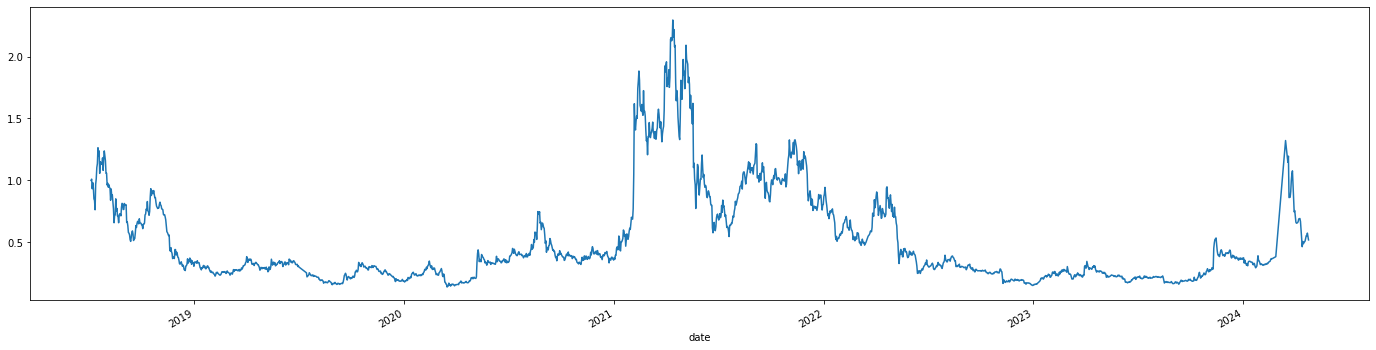

In [65]:
data['ask'].plot(figsize=(24,6))

<Figure size 432x288 with 0 Axes>

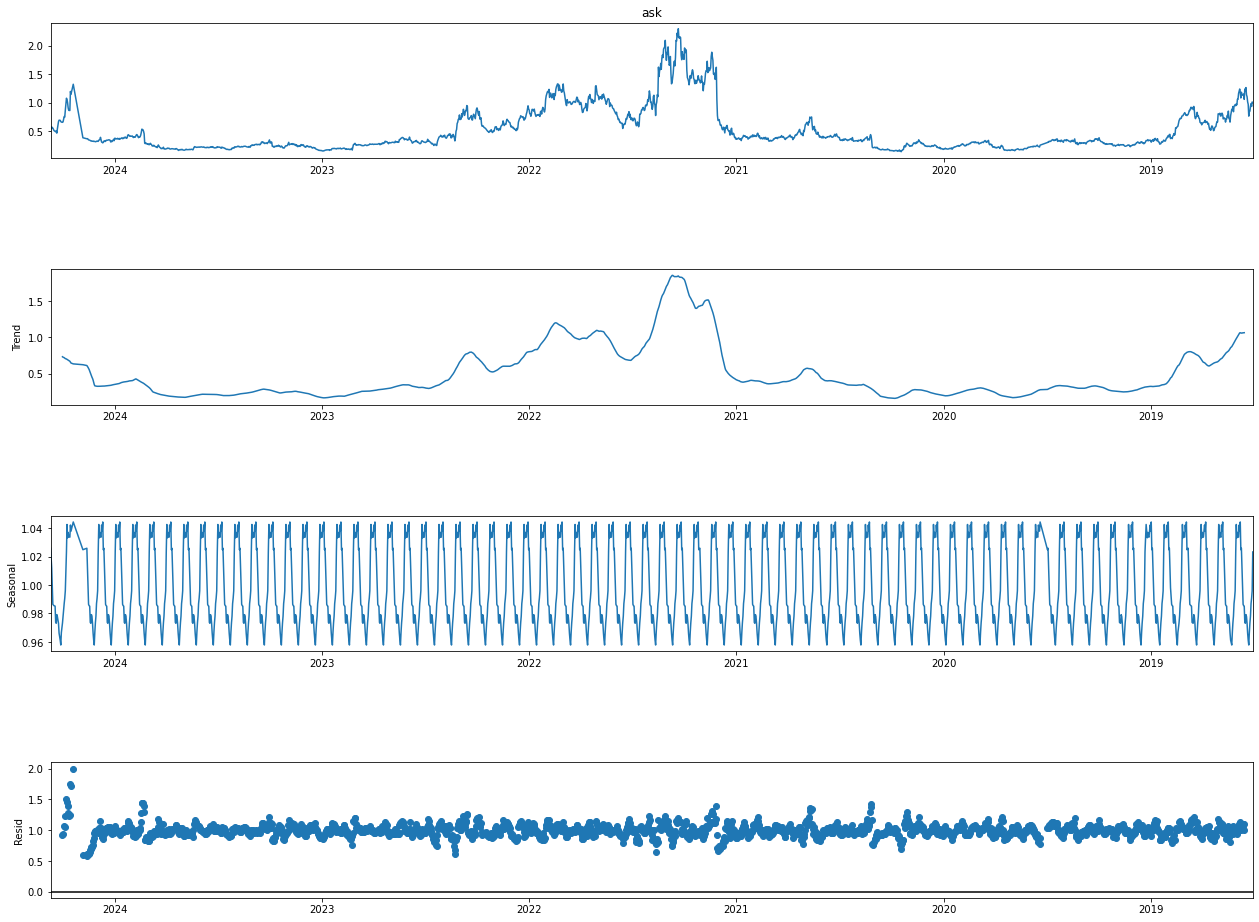

In [66]:
decomposition = seasonal_decompose(data['ask'], model='multiplicative', period=30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 15)

In [67]:
print("ADF Test:")
adf_test = adfuller(data['ask'], autolag='AIC')
print('Null Hypothesis: Not Stationary')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))
if (adf_test[1] < 0.05):
    print('Stationary')
else:
    print('Not Stationary')

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -2.292695
p-value: 0.174335
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Not Stationary


In [68]:
print("KPSS Test:")
kpss_test = kpss(data['ask'], regression='c', nlags=None, store=False)
print('Null Hypothesis: Stationary')
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))
if (kpss_test[1] < 0.05):
    print('Not Stationary')
else:
    print('Stationary')

KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.748908
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Not Stationary


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [69]:
pip install autots

Note: you may need to restart the kernel to use updated packages.


In [70]:
from autots import AutoTS, load_daily

model = AutoTS(
    forecast_length=30,
    frequency='infer',
    ensemble='simple',
)

Using 5 cpus for n_jobs.


In [71]:
df = nasdaqdatalink.get_table('QDL/BITFINEX', code='ZRXUSD')

In [ ]:
model = model.fit(
    df,
    date_col= 'date',
    value_col= 'ask',
    id_col= None,
)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 7 with model DatepartRegression in generation 0 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 20
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 8 in generation 0: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 20
Model Number: 10 with model ETS in generation 0 of 20
Model Number: 11 with model GLM in generation 0 of 20
Model Number: 12 with model GLM in generation 0 of 20
Model Number: 13 with model GLS in generation 0 of 20
Model Number: 14 with model GLS in generation 0 of 20
Model Number: 15 with model LastValueNaive in generation 0 of 20
Model Number: 16 with model LastValueNaive in generation 0 of 20
Model Number: 17 with model LastValueNaive in generation 0 of 20
Model Number: 18 with model LastValueNaive in generation 0 of 20
Model Number: 19 with model SeasonalNaive in generation 0 of 20
Model Number: 20 with model SeasonalNaive in generation 0 of 20
Model Number: 21 with model SeasonalNaive in generation 0 of 20
Model Numbe

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 31 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Mod

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 64 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 64 in generation 0: FBProphet
Model Number: 65 with model UnobservedComponents in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {'model': 'GLS', 'phi': 0.999, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 65 in generation 0: UnobservedComponents
Model Number: 66 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one vari

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 100 with model ETS in generation 0 of 20
Model Number: 101 with model DatepartRegression in generation 0 of 20
Model Number: 102 with model LastValueNaive in generation 0 of 20
Model Number: 103 with model WindowRegression in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 103 in generation 0: WindowRegression
Model Number: 104 with model SeasonalityMotif in generation 0 of 20
Model Number: 105 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105 in generation 0: VAR
Model Number: 106 with model ETS in generation 0 of 20
Model Number: 107 with model SeasonalityMotif in generation 0 of 20
Model Number: 108 with model UnivariateMotif in generation 0 of 20
Model Number: 109 with model LastValueNaive in generation 0 of 20
Model Number: 110 with model SeasonalNaive in generation 0 of 20
Model Number: 111 with model UnivariateMotif in generation 0 of 20
Model Number:

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\scipy\interpolate\polyint.py:544: RuntimeWarning: overflow encountered in multiply
  self.wi[:j] *= (self.xi[j]-self.xi[:j])
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning: overflow encountered in reduce
  self.wi[j] = np.multiply.reduce(self.xi[:j]-self.xi[j])
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\scipy\interpolate\polyint.py:642: RuntimeWarning: invalid value encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


Model Number: 114 with model LastValueNaive in generation 0 of 20
Model Number: 115 with model GLM in generation 0 of 20
Model Number: 116 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 116 in generation 0: ARCH
Model Number: 117 with model DatepartRegression in generation 0 of 20
Model Number: 118 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 118 in generation 0: VAR
Model Number: 119 with model MetricMotif in generation 0 of 20
Model Number: 120 with model GLM in generation 0 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 120 in generation 0: GLM
Model Number: 121 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 121 in generation 0: SectionalMotif
Model Number: 122 with model DatepartRegress

Model Number: 171 with model ETS in generation 0 of 20
Model Number: 172 with model UnivariateMotif in generation 0 of 20
Model Number: 173 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 173 in generation 0: ARCH
Model Number: 174 with model LastValueNaive in generation 0 of 20
Model Number: 175 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 175 in generation 0: VAR
Model Number: 176 with model UnobservedComponents in generation 0 of 20
Model Number: 177 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 177 in generation 0: DatepartRegression
Model Number: 178 with model AverageValueNaive in generation 0 of 20
Model Number: 179 with model SeasonalityMotif in generation 0 of 20
Model Number: 180 with model ARIMA in generation 0 of 20
Template Eval E

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10401e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 189 with model MultivariateMotif in generation 1 of 20
Template Eval Error: Exception("Transformer RobustScaler failed on fit from params mean {'0': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}, '1': {}, '2': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'last_value'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {}, '5': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': False}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}}") in model 189 in generation 1: MultivariateMotif
Model Number: 190 with model ETS in generation 1 of 20
Model Number: 191 with model 

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 229 with model DatepartRegression in generation 1 of 20
Model Number: 230 with model AverageValueNaive in generation 1 of 20
Model Number: 231 with model SeasonalityMotif in generation 1 of 20
Model Number: 232 with model ARIMA in generation 1 of 20
Model Number: 233 with model ETS in generation 1 of 20
Model Number: 234 with model Theta in generation 1 of 20
Model Number: 235 with model WindowRegression in generation 1 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 235 in generation 1: WindowRegression
Model Number: 236 with model UnobservedComponents in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 236 in generation 1: UnobservedComponents
Model Number: 237 with model LastValueNaive in generation 1 of 20
Model Number: 238 with model ETS in generation 1 of 20
Model Number: 239 with model MultivariateRegression in generation 1 of 20
Model Number: 240 with model M

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'center': 'midhinge'}, '1': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '2': {'window': 28}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 281 in generation 1: UnobservedComponents
Model Number: 282 with model UnobservedComponents in generation 1 of 20
Model Number: 283 with model LastValueNaive in generation 1 of 20
Model Number: 284 with model MetricMotif in generation 1 of 20
Model Number: 285 with model MetricMotif in generation 1 of 20
Model Number: 286 with model UnivariateMotif in generation 1 of 20
Model Number: 287 with model GLM in generation 1 of 20
Model Number: 288 with model UnivariateRegression in generation 1 of 20
Model Number: 289 with model SeasonalityMotif in generation 1 of 20
Model Number: 290

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountere

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountere

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountere

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountere

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountere

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountered in square
  self.vs = [self.beta_2 * v + (1 - self.beta_2) * (grad ** 2)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:263: RuntimeWarning: overflow encountere

Model Number: 324 with model ETS in generation 2 of 20
Model Number: 325 with model NVAR in generation 2 of 20
Model Number: 326 with model UnobservedComponents in generation 2 of 20
Model Number: 327 with model AverageValueNaive in generation 2 of 20
Model Number: 328 with model AverageValueNaive in generation 2 of 20
Model Number: 329 with model SectionalMotif in generation 2 of 20
Model Number: 330 with model GLS in generation 2 of 20
Model Number: 331 with model SeasonalNaive in generation 2 of 20
Model Number: 332 with model MetricMotif in generation 2 of 20
Model Number: 333 with model AverageValueNaive in generation 2 of 20
Model Number: 334 with model MetricMotif in generation 2 of 20
Model Number: 335 with model GLS in generation 2 of 20
Model Number: 336 with model WindowRegression in generation 2 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\decomposition\_fastica.py:462: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')


Model Number: 337 with model UnivariateMotif in generation 2 of 20
Model Number: 338 with model MultivariateMotif in generation 2 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 339 with model SectionalMotif in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'window_size': 364, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'last_value'}, '1': {}, '2': {'lag_1': 12, 'method': 'Median'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '4': {}}") in model 339 in generation 2: SectionalMotif
Model Number: 340 with model ARIMA in generation 2 of 20
Model Number: 341 with model ETS in generation 2 of 20
Model Number: 342 with model UnivariateMotif in generation 2 of 20
Model Number: 343 with model NVAR in generation 2 of 20
Model Number: 344 with model ConstantNaive in generation 2 of 20
Model Number: 345 with model LastValueNaive in generation 2 of 20
Model Number: 346 with model GLM in generation 2 of 20
Model Number: 347 with model GLM in generation 2 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 348 with model AverageValueNaive in generation 2 of 20
Model Number: 349 with model GLS in generation 2 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0.001, 'reg_lambda': 1, 'n_estimators': 1000}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'ffill'}, '1': {}, '2': {'model_name': 'X1', 'state_transition': [[1, 1, 0], [0, 1, 0], [0, 0, 1]], 'process_noise': [[0.1, 0.0, 0.0], [0.0, 0.01, 0.0], [0.0, 0.0, 0.1]], 'observation_model': [[1, 1, 1]], 'observation_noise': 1.0, 'em_iter': None}, '3': {'rows': 7, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 3}}") in model 349 in generation 2: GLS
Model Number: 350 with model Theta in generation 2 of 20
Model Number: 351 with model Theta in generation

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 386 with model UnivariateMotif in generation 2 of 20
Model Number: 387 with model MultivariateRegression in generation 2 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 387 in generation 2: MultivariateRegression
Model Number: 388 with model MultivariateMotif in generation 2 of 20
Model Number: 389 with model UnivariateRegression in generation 2 of 20
Model Number: 390 with model MultivariateRegression in generation 2 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params nearest {'0': {'low': 6, 'high': 364, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '1': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 9, 'eta': 0.3, 'min_child_weight': 5, 'subsample': 0.9, 'colsample_bylevel': 0.7, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 10}, 'datepart_method': 'simple_b

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.23367e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 422 with model UnobservedComponents in generation 2 of 20
Model Number: 423 with model SeasonalityMotif in generation 2 of 20
Model Number: 424 with model MultivariateMotif in generation 2 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}, 'holiday_co

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10401e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 431 in generation 2: UnobservedComponents
New Generation: 3 of 20
Model Number: 432 with model GLS in generation 3 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean_24 {'0': {'window_size': 30, 'alpha': 2.5, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'average'}, '1': {'model': 'Gamma', 'phi': 0.99, 'window': 30, 'transform_dict': None}, '2': {}}") in model 432 in generation 3: GLS
Model Number: 433 with model SeasonalityMotif in generation 3 of 20
Model Number: 434 with model ETS in generation 3 of 20
Model Number: 435 with model SeasonalNaive in generation 3 of 20
Model Number: 436 with model AverageValueNaive in generation 3 of 20
Model Number: 437 with model SectionalMotif in generation 3 of 20
Model Number: 438 with model ETS in generation 3 of 20
Model Number: 439 with model ConstantNaive in generation 3 of 20
Mod

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 470 with model DatepartRegression in generation 3 of 20
Model Number: 471 with model MultivariateMotif in generation 3 of 20
Model Number: 472 with model DatepartRegression in generation 3 of 20
Model Number: 473 with model UnivariateMotif in generation 3 of 20
Model Number: 474 with model AverageValueNaive in generation 3 of 20
Model Number: 475 with model UnivariateRegression in generation 3 of 20
Model Number: 476 with model SectionalMotif in generation 3 of 20
Model Number: 477 with model UnivariateMotif in generation 3 of 20
Model Number: 478 with model UnivariateMotif in generation 3 of 20
Model Number: 479 with model SeasonalNaive in generation 3 of 20
Model Number: 480 with model ETS in generation 3 of 20
Model Number: 481 with model SeasonalNaive in generation 3 of 20
Model Number: 482 with model MetricMotif in generation 3 of 20
Model Number: 483 with model ARIMA in generation 3 of 20
Model Number: 484 with model SeasonalNaive in generation 3 of 20
Model Number:

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 487 with model MetricMotif in generation 3 of 20
Model Number: 488 with model AverageValueNaive in generation 3 of 20
Model Number: 489 with model Theta in generation 3 of 20
Model Number: 490 with model GLS in generation 3 of 20
Model Number: 491 with model ETS in generation 3 of 20
Model Number: 492 with model SeasonalNaive in generation 3 of 20
Model Number: 493 with model AverageValueNaive in generation 3 of 20
Model Number: 494 with model MultivariateMotif in generation 3 of 20
Model Number: 495 with model ETS in generation 3 of 20
Model Number: 496 with model UnivariateRegression in generation 3 of 20
Model Number: 497 with model UnivariateMotif in generation 3 of 20
Model Number: 498 with model Theta in generation 3 of 20
Model Number: 499 with model MultivariateRegression in generation 3 of 20
Model Number: 500 with model GLM in generation 3 of 20
Model Number: 501 with model SectionalMotif in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLas

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '3': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 10}, '4': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'mi

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 512 with model GLS in generation 3 of 20
Model Number: 513 with model ETS in generation 3 of 20
Model Number: 514 with model LastValueNaive in generation 3 of 20
Model Number: 515 with model ARIMA in generation 3 of 20
Model Number: 516 with model NVAR in generation 3 of 20
Model Number: 517 with model UnivariateMotif in generation 3 of 20
Model Number: 518 with model AverageValueNaive in generation 3 of 20
Model Number: 519 with model ConstantNaive in generation 3 of 20
Model Number: 520 with model Theta in generation 3 of 20
Model Number: 521 with model SeasonalNaive in generation 3 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformatio

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.23367e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 523 with model Theta in generation 3 of 20
Model Number: 524 with model GLS in generation 3 of 20
Model Number: 525 with model MultivariateMotif in generation 3 of 20
Model Number: 526 with model NVAR in generation 3 of 20
Model Number: 527 with model MetricMotif in generation 3 of 20
Model Number: 528 with model DatepartRegression in generation 3 of 20
Model Number: 529 with model UnivariateRegression in generation 3 of 20
Model Number: 530 with model SeasonalNaive in generation 3 of 20
Model Number: 531 with model MultivariateRegression in generation 3 of 20
Model Number: 532 with model DatepartRegression in generation 3 of 20
Model Number: 533 with model WindowRegression in generation 3 of 20
Model Number: 534 with model ARIMA in generation 3 of 20
Model Number: 535 with model SeasonalNaive in generation 3 of 20
Model Number: 536 with model SeasonalityMotif in generation 3 of 20
Model Number: 537 with model GLS in generation 3 of 20
Model Number: 538 with model Unobser

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.218692779541016, tolerance: 0.009966458193957806
  model = cd_fast.enet_coordinate_descent(


Model Number: 541 with model UnivariateRegression in generation 3 of 20
Model Number: 542 with model ConstantNaive in generation 3 of 20
Model Number: 543 with model ConstantNaive in generation 3 of 20
Model Number: 544 with model AverageValueNaive in generation 3 of 20
Model Number: 545 with model ConstantNaive in generation 3 of 20
Model Number: 546 with model SectionalMotif in generation 3 of 20
Model Number: 547 with model GLS in generation 3 of 20
Model Number: 548 with model UnivariateMotif in generation 3 of 20
Model Number: 549 with model UnivariateRegression in generation 3 of 20
Model Number: 550 with model LastValueNaive in generation 3 of 20
Model Number: 551 with model SectionalMotif in generation 3 of 20
Model Number: 552 with model ETS in generation 3 of 20
Model Number: 553 with model Theta in generation 3 of 20
Model Number: 554 with model MetricMotif in generation 3 of 20
Model Number: 555 with model SeasonalNaive in generation 3 of 20
Model Number: 556 with model Uno

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10401e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params zero {'0': {'span': 7}, '1': {'method': 'IsolationForest', 'method_params': {'contamination': 'auto', 'n_estimators': 100, 'max_features': 1.0, 'bootstrap': True}, 'fillna': 'fake_date', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': True}, '2': {'window': 28}, '3': {'output_distribution': 'uniform', 'n_quantiles': 1000}}") in model 556 in generation 3: UnobservedComponents
New Generation: 4 of 20
Model Number: 557 with model DatepartRegression in generation 4 of 20
Model Number: 558 with model DatepartRegression in generation 4 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.3076629638672, tolerance: 0.02907625585794449
  model = cd_fast.enet_coordinate_descent(


Model Number: 559 with model MetricMotif in generation 4 of 20
Model Number: 560 with model Theta in generation 4 of 20
Model Number: 561 with model AverageValueNaive in generation 4 of 20
Model Number: 562 with model SeasonalNaive in generation 4 of 20
Model Number: 563 with model LastValueNaive in generation 4 of 20
Model Number: 564 with model SeasonalNaive in generation 4 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 565 with model MetricMotif in generation 4 of 20
Model Number: 566 with model LastValueNaive in generation 4 of 20
Model Number: 567 with model SeasonalityMotif in generation 4 of 20
Model Number: 568 with model GLM in generation 4 of 20
Model Number: 569 with model ARIMA in generation 4 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 570 with model SeasonalNaive in generation 4 of 20
Model Number: 571 with model UnobservedComponents in generation 4 of 20
Model Number: 572 with model GLM in generation 4 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 572 in generation 4: GLM
Model Number: 573 with model SeasonalNaive in generation 4 of 20
Model Number: 574 with model MetricMotif in generation 4 of 20
Model Number: 575 with model UnobservedComponents in generation 4 of 20
Model Number: 576 with model DatepartRegression in generation 4 of 20
Model Number: 577 with model MultivariateMotif in generation 4 of 20
Model Number: 578 with model GLS in generation 4 of 20
Model Number: 579 with model SectionalMotif in generation 4 of 20
Model Number: 580 with model ETS in generation 4 of 20
Model Number: 581 with model UnobservedComponents in generation 4 of 20
Model Number: 582 with model GLS in generation 4 of 20
Model Number: 583 with model SeasonalNaive in

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 592 with model WindowRegression in generation 4 of 20
Model Number: 593 with model MetricMotif in generation 4 of 20
Model Number: 594 with model MultivariateRegression in generation 4 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on inverse from params ffill {'0': {}, '1': {}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}}") in model 594 in generation 4: MultivariateRegression
Model Number: 595 with model AverageValueNaive in generation 4 of 20
Model Number: 596 with model UnivariateRegression in generation 4 of 20
Model Number: 597 with model Theta in generation 4 of 20
Model Number: 598 with model MultivariateMotif in generation 4 of 20
Model Number: 599 with model ConstantNaive in generation 4 of 20
Model Number: 600 with model SeasonalNaive in generation 4 of 20
Model Number: 601 with model Theta in generation 4 of 20
Model Number: 602 with model ETS in generation 4 of 20
Model Number: 6

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 608 with model UnobservedComponents in generation 4 of 20
Model Number: 609 with model ARIMA in generation 4 of 20
Model Number: 610 with model GLS in generation 4 of 20
Model Number: 611 with model NVAR in generation 4 of 20
Model Number: 612 with model GLM in generation 4 of 20
Model Number: 613 with model AverageValueNaive in generation 4 of 20
Model Number: 614 with model MetricMotif in generation 4 of 20
Model Number: 615 with model NVAR in generation 4 of 20
Model Number: 616 with model AverageValueNaive in generation 4 of 20
Model Number: 617 with model MultivariateMotif in generation 4 of 20
Model Number: 618 with model LastValueNaive in generation 4 of 20
Model Number: 619 with model NVAR in generation 4 of 20
Model Number: 620 with model ETS in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 632 with model UnobservedComponents in generation 4 of 20
Model Number: 633 with model UnivariateMotif in generation 4 of 20
Model Number: 634 with model UnivariateMotif in generation 4 of 20
Model Number: 635 with model GLS in generation 4 of 20
Model Number: 636 with model MetricMotif in generation 4 of 20
Model Number: 637 with model SectionalMotif in generation 4 of 20
Model Number: 638 with model GLM in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'det_order': -1, 'k_ar_diff': 1}, '1': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 3, 'eta': 0.003, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.9, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': ['weekdayofmonth', 'weekdayofmonth']}, 'fillna': None}}") in model 638 in generation 4: GLM
Model N

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 654 with model UnivariateMotif in generation 4 of 20
Model Number: 655 with model GLM in generation 4 of 20
Model Number: 656 with model DatepartRegression in generation 4 of 20
Model Number: 657 with model UnobservedComponents in generation 4 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993.6458129882812, tolerance: 0.20909999310970306
  model = cd_fast.enet_coordinate_descent(


Model Number: 658 with model LastValueNaive in generation 4 of 20
Model Number: 659 with model UnivariateMotif in generation 4 of 20
Model Number: 660 with model MultivariateRegression in generation 4 of 20
Model Number: 661 with model MultivariateRegression in generation 4 of 20
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params ffill {'0': {'fixed': True, 'window': 5, 'macro_micro': False, 'center': False}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}, '3': {'output_distribution': 'uniform', 'n_quantiles': 522}}") in model 661 in generation 4: MultivariateRegression
Model Number: 662 with model GLS in generation 4 of 20
Model Number: 663 with model UnivariateMotif in generation 4 of 20
Model Number: 664 with model MultivariateMotif in generation 4 of 20
Model Number: 665 with model GLS in generati

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.08524513244629, tolerance: 0.0063453298062086105
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 679 in generation 4: DatepartRegression
Model Number: 680 with model UnivariateMotif in generation 4 of 20
Model Number: 681 with model MetricMotif in generation 4 of 20
New Generation: 5 of 20
Model Number: 682 with model ARIMA in generation 5 of 20
Model Number: 683 with model SeasonalityMotif in generation 5 of 20
Model Number: 684 with model MultivariateMotif in generation 5 of 20
Model Number: 685 with model MetricMotif in generation 5 of 20
Model Number: 686 with model UnivariateRegression in generation 5 of 20
Model Number: 687 with model UnobservedComponents in generation 5 of 20
Model Number: 688 with model DatepartRegression in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 688 in generation 5: DatepartRegression
Model Number: 689 with model DatepartRegression in generation 5 o

Model Number: 772 with model MultivariateMotif in generation 5 of 20
Model Number: 773 with model UnivariateMotif in generation 5 of 20
Model Number: 774 with model UnobservedComponents in generation 5 of 20
Model Number: 775 with model MultivariateMotif in generation 5 of 20
Model Number: 776 with model UnobservedComponents in generation 5 of 20
Model Number: 777 with model ETS in generation 5 of 20
Model Number: 778 with model MetricMotif in generation 5 of 20
Model Number: 779 with model SeasonalNaive in generation 5 of 20
Model Number: 780 with model SeasonalityMotif in generation 5 of 20
Model Number: 781 with model LastValueNaive in generation 5 of 20
New Generation: 6 of 20
Model Number: 782 with model SectionalMotif in generation 6 of 20
Model Number: 783 with model SectionalMotif in generation 6 of 20
Model Number: 784 with model UnobservedComponents in generation 6 of 20
Model Number: 785 with model ETS in generation 6 of 20
Model Number: 786 with model ARIMA in generation 6 

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 796 with model MetricMotif in generation 6 of 20
Model Number: 797 with model SeasonalNaive in generation 6 of 20
Model Number: 798 with model NVAR in generation 6 of 20
Model Number: 799 with model GLM in generation 6 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 799 in generation 6: GLM
Model Number: 800 with model AverageValueNaive in generation 6 of 20
Model Number: 801 with model SeasonalityMotif in generation 6 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 802 with model DatepartRegression in generation 6 of 20
Model Number: 803 with model DatepartRegression in generation 6 of 20
Template Eval Error: KeyError('model') in model 803 in generation 6: DatepartRegression
Model Number: 804 with model Theta in generation 6 of 20
Model Number: 805 with model ConstantNaive in generation 6 of 20
Model Number: 806 with model UnobservedComponents in generation 6 of 20
Model Number: 807 with model ARIMA in generation 6 of 20
Model Number: 808 with model ARIMA in generation 6 of 20
Model Number: 809 with model SeasonalNaive in generation 6 of 20
Model Number: 810 with model UnivariateMotif in generation 6 of 20
Model Number: 811 with model SectionalMotif in generation 6 of 20
Model Number: 812 with model LastValueNaive in generation 6 of 20
Model Number: 813 with model AverageValueNaive in generation 6 of 20
Model Number: 814 with model MultivariateMotif in generation 6 of 20
Model Number: 815 with model SeasonalNaive in generation 6 of 

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10401e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 838 with model MetricMotif in generation 6 of 20
Model Number: 839 with model UnobservedComponents in generation 6 of 20
Model Number: 840 with model ETS in generation 6 of 20
Model Number: 841 with model AverageValueNaive in generation 6 of 20
Model Number: 842 with model SeasonalNaive in generation 6 of 20
Model Number: 843 with model AverageValueNaive in generation 6 of 20
Model Number: 844 with model DatepartRegression in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 844 in generation 6: DatepartRegression
Model Number: 845 with model AverageValueNaive in generation 6 of 20
Model Number: 846 with model ARIMA in generation 6 of 20
Model Number: 847 with model Theta in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'model_name': 'ucm_deterministic_trend', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.01, 0], [0, 0.

Model Number: 903 with model GLM in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params quadratic {'0': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '1': {}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'model': 'Gamma', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}}") in model 903 in generation 7: GLM
Model Number: 904 with model MetricMotif in generation 7 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 905 with model GLS in generation 7 of 20
Model Number: 906 with model DatepartRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 906 in generation 7: DatepartRegression
Model Number: 907 with model SeasonalNaive in generation 7 of 20
Model Number: 908 with model SeasonalityMotif in generation 7 of 20
Model Number: 909 with model UnivariateMotif in generation 7 of 20
Model Number: 910 with model UnobservedComponents in generation 7 of 20
Model Number: 911 with model DatepartRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 911 in generation 7: DatepartRegression
Model Number: 912 with model ARIMA in generation 7 of 20
Model Number: 913 with model UnobservedComponents in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {'det_order': 0, 'k_ar_diff': 0},

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 931 with model AverageValueNaive in generation 7 of 20
Model Number: 932 with model ARIMA in generation 7 of 20
Model Number: 933 with model MultivariateMotif in generation 7 of 20
Model Number: 934 with model SeasonalNaive in generation 7 of 20
Model Number: 935 with model ETS in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.03}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'median_value', 'regression_params': {}}, '1': {'method': 100}, '2': {'rows': 7, 'lag': 1, 'method': 'additive',

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 944 with model MetricMotif in generation 7 of 20
Model Number: 945 with model NVAR in generation 7 of 20
Model Number: 946 with model MultivariateMotif in generation 7 of 20
Model Number: 947 with model SectionalMotif in generation 7 of 20
Model Number: 948 with model MultivariateMotif in generation 7 of 20
Model Number: 949 with model ETS in generation 7 of 20
Model Number: 950 with model LastValueNaive in generation 7 of 20
Model Number: 951 with model SeasonalityMotif in generation 7 of 20
Model Number: 952 with model MultivariateMotif in generation 7 of 20
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params zero {'0': {'low': 4, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '1': {'rolling_window': 360, 'n_tails': 30, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'output_distribution': 'uniform', 'n_

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.2769775390625, tolerance: 0.029493004083633423
  model = cd_fast.enet_coordinate_descent(


Model Number: 966 with model SectionalMotif in generation 7 of 20
Model Number: 967 with model SectionalMotif in generation 7 of 20
Model Number: 968 with model MetricMotif in generation 7 of 20
Model Number: 969 with model SectionalMotif in generation 7 of 20
Model Number: 970 with model Theta in generation 7 of 20
Model Number: 971 with model ARIMA in generation 7 of 20
Model Number: 972 with model SeasonalityMotif in generation 7 of 20
Model Number: 973 with model UnobservedComponents in generation 7 of 20
Model Number: 974 with model UnivariateRegression in generation 7 of 20
Model Number: 975 with model GLM in generation 7 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 975 in generation 7: GLM
Model Number: 976 with model SeasonalNaive in generation 7 of 20
Model Number: 977 with model SeasonalNaive in generation 7 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 978 with model AverageValueNaive in generation 7 of 20
Model Number: 979 with model ARIMA in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'model_name': 'MA', 'state_transition': [[1, 0], [1, 0]], 'process_noise': [[0.2, 0.0], [0.0, 0]], 'observation_model': [[1, 0.1]], 'observation_noise': 1.0, 'em_iter': None}, '3': {}}") in model 979 in generation 7: ARIMA
Model Number: 980 with model SeasonalNaive in generation 7 of 20
Model Number: 981 with model MultivariateMotif in generation 7 of 20
New Generation: 8 of 20
Model Number: 982 with model Theta in generation 8 of 20
Model Number: 983 with model UnivariateRegression in generation 8 of 20
Model Number: 984 with model ETS in generation 8 of 20
Model Number: 985 with model SeasonalityMotif in generation 8 of 20
Template Eval Error: Exception("Trans

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 989 with model ETS in generation 8 of 20
Model Number: 990 with model MetricMotif in generation 8 of 20
Template Eval Error: IndexError('index 2059 is out of bounds for axis 0 with size 1045') in model 990 in generation 8: MetricMotif
Model Number: 991 with model SectionalMotif in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.9, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100}, 'datepart_method': 'simple_2'}, 'fillna': 'linear'}, '1': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '2': {'window': 28}, '3': {}, '4': {'decimals': 1, 'on_transform': True, 'on_inverse': True}}") in model 991 in generation 8: SectionalMotif
Model Number: 992 with model MultivariateRegression in generation 8 of 20
Model

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10401e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 996 with model NVAR in generation 8 of 20
Model Number: 997 with model UnivariateMotif in generation 8 of 20
Model Number: 998 with model MetricMotif in generation 8 of 20
Model Number: 999 with model LastValueNaive in generation 8 of 20
Model Number: 1000 with model MetricMotif in generation 8 of 20
Model Number: 1001 with model UnivariateMotif in generation 8 of 20
Model Number: 1002 with model GLS in generation 8 of 20
Model Number: 1003 with model DatepartRegression in generation 8 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.531475067138672, tolerance: 0.017441390082240105
  model = cd_fast.enet_coordinate_descent(


Model Number: 1004 with model UnivariateMotif in generation 8 of 20
Model Number: 1005 with model AverageValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}, '3': {}, '4': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}}") in model 1005 in generation 8: AverageValueNaive
Model Number: 1006 with model UnivariateMotif in generation 8 of 20
Model Number: 1007 with model ARIMA in generation 8 of 20
Model Number: 1008 with model SectionalMotif in generation 8 of 20
Model Number: 1009 with model SectionalMotif in generation 8 of 20
Model Number: 1010 with model SectionalMotif in generation 8 of 20

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1062 with model Theta in generation 8 of 20
Model Number: 1063 with model AverageValueNaive in generation 8 of 20
Model Number: 1064 with model DatepartRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1064 in generation 8: DatepartRegression
Model Number: 1065 with model UnobservedComponents in generation 8 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 1065 in generation 8: UnobservedComponents
Model Number: 1066 with model GLS in generation 8 of 20
Model Number: 1067 with model UnobservedComponents in generation 8 of 20
Model Number: 1068 with model ConstantNaive in generation 8 of 20
Model Number: 1069 with model NVAR in generation 8 of 20
Model Number: 1070 with model GLS in generation 8 of 20
Model Number: 1071 with model WindowRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1071 in ge

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1075 with model MetricMotif in generation 8 of 20
Model Number: 1076 with model ARIMA in generation 8 of 20
Model Number: 1077 with model MultivariateMotif in generation 8 of 20
Model Number: 1078 with model Theta in generation 8 of 20
Model Number: 1079 with model ARIMA in generation 8 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'lag_1': 96, 'method': 'LastValue'}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 6}}}, 'isolated_only': False}}") in model 1079 in generation 8: ARIMA
Model Number: 1080 with model GLS in generation 8 of 20
Model Number: 1081 with model SectionalMotif in generation 8 of 20
Template Eval Error: Val

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1102 with model SectionalMotif in generation 9 of 20
Model Number: 1103 with model SectionalMotif in generation 9 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1103 in generation 9: SectionalMotif
Model Number: 1104 with model WindowRegression in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1104 in generation 9: WindowRegression
Model Number: 1105 with model ETS in generation 9 of 20
Model Number: 1106 with model UnobservedComponents in generation 9 of 20
Model Number: 1107 with model SeasonalityMotif in generation 9 of 20
Model Number: 1108 with model SectionalMotif in generation 9 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1108 in generation 9: SectionalMotif
Model Number: 1109 with model Theta in generation 9 of 20
Model Number: 1110 with model ARIMA in generation 9 of 20
Mod

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.192901611328125, tolerance: 0.011131261475384235
  model = cd_fast.enet_coordinate_descent(


Model Number: 1115 with model MetricMotif in generation 9 of 20
Model Number: 1116 with model ConstantNaive in generation 9 of 20
Model Number: 1117 with model GLM in generation 9 of 20
Model Number: 1118 with model UnivariateRegression in generation 9 of 20
Model Number: 1119 with model SeasonalNaive in generation 9 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill_mean_biased {'0': {}, '1': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '2': {}, '3': {'regression_model': {'C': 1.0, 'tol': 0.0001, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'HistoricValues', '1': 'StandardScaler'}, 'transformation_params': {'0': {'window': None}, '1': {}}}, 'holiday_countries_used': False}, '4': {'fixed': False, 'window': 28, 'macro_micro': False, 'center': True}}") in model 1119 in generation 9: SeasonalNaive

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\decomposition\_fastica.py:462: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')


Model Number: 1146 with model LastValueNaive in generation 9 of 20
Model Number: 1147 with model ConstantNaive in generation 9 of 20
Model Number: 1148 with model MetricMotif in generation 9 of 20
Model Number: 1149 with model GLS in generation 9 of 20
Model Number: 1150 with model SeasonalNaive in generation 9 of 20
Model Number: 1151 with model UnivariateMotif in generation 9 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'PositiveShift', '2': 'PositiveShift'}, 'transformation_params': {'0': {}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 1151 in generation 9: UnivariateMotif
Model Number: 1152 with model UnivariateMotif in generation 9 of 20
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1152 in generation 9: UnivariateMotif
Model Number: 1153 with model SeasonalityMotif in g

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19118133187294006, tolerance: 3.85038583772257e-05
  model = cd_fast.enet_coordinate_descent(


Model Number: 1210 with model MultivariateMotif in generation 10 of 20
Model Number: 1211 with model SeasonalNaive in generation 10 of 20
Model Number: 1212 with model ARIMA in generation 10 of 20
Model Number: 1213 with model SectionalMotif in generation 10 of 20
Model Number: 1214 with model ConstantNaive in generation 10 of 20
Model Number: 1215 with model UnivariateMotif in generation 10 of 20
Model Number: 1216 with model NVAR in generation 10 of 20
Model Number: 1217 with model MetricMotif in generation 10 of 20
Model Number: 1218 with model SectionalMotif in generation 10 of 20
Model Number: 1219 with model UnivariateMotif in generation 10 of 20
Model Number: 1220 with model SeasonalNaive in generation 10 of 20
Model Number: 1221 with model ETS in generation 10 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params nearest {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1223 with model AverageValueNaive in generation 10 of 20
Model Number: 1224 with model MultivariateMotif in generation 10 of 20
Model Number: 1225 with model AverageValueNaive in generation 10 of 20
Model Number: 1226 with model GLS in generation 10 of 20
Model Number: 1227 with model UnivariateMotif in generation 10 of 20
Model Number: 1228 with model UnivariateMotif in generation 10 of 20
Model Number: 1229 with model MultivariateMotif in generation 10 of 20
Model Number: 1230 with model SeasonalityMotif in generation 10 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params quadratic {'0': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params':

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1262 with model MultivariateMotif in generation 11 of 20
Model Number: 1263 with model ARIMA in generation 11 of 20
Model Number: 1264 with model NVAR in generation 11 of 20
Model Number: 1265 with model NVAR in generation 11 of 20
Model Number: 1266 with model NVAR in generation 11 of 20
Model Number: 1267 with model UnivariateMotif in generation 11 of 20
Model Number: 1268 with model SeasonalNaive in generation 11 of 20
Model Number: 1269 with model SeasonalNaive in generation 11 of 20
Model Number: 1270 with model ARIMA in generation 11 of 20
Model Number: 1271 with model LastValueNaive in generation 11 of 20
Model Number: 1272 with model ETS in generation 11 of 20
Model Number: 1273 with model MetricMotif in generation 11 of 20
Model Number: 1274 with model SeasonalityMotif in generation 11 of 20
Model Number: 1275 with model SectionalMotif in generation 11 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params rolling_mean_24 {'0

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10401e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 1279 with model UnivariateMotif in generation 11 of 20
Model Number: 1280 with model SectionalMotif in generation 11 of 20
Model Number: 1281 with model NVAR in generation 11 of 20
Model Number: 1282 with model MultivariateRegression in generation 11 of 20
Model Number: 1283 with model ETS in generation 11 of 20
Model Number: 1284 with model SeasonalNaive in generation 11 of 20
Model Number: 1285 with model MultivariateMotif in generation 11 of 20
Model Number: 1286 with model MultivariateMotif in generation 11 of 20
Model Number: 1287 with model AverageValueNaive in generation 11 of 20
Model Number: 1288 with model AverageValueNaive in generation 11 of 20
Model Number: 1289 with model MetricMotif in generation 11 of 20
Model Number: 1290 with model UnivariateMotif in generation 11 of 20
Model Number: 1291 with model ARIMA in generation 11 of 20
Model Number: 1292 with model MultivariateMotif in generation 11 of 20
Model Number: 1293 with model GLS in generation 11 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1342 with model MetricMotif in generation 12 of 20
Model Number: 1343 with model LastValueNaive in generation 12 of 20
Model Number: 1344 with model SeasonalNaive in generation 12 of 20
Model Number: 1345 with model MetricMotif in generation 12 of 20
Model Number: 1346 with model SeasonalityMotif in generation 12 of 20
Model Number: 1347 with model LastValueNaive in generation 12 of 20
Model Number: 1348 with model SectionalMotif in generation 12 of 20
Model Number: 1349 with model MetricMotif in generation 12 of 20
Model Number: 1350 with model UnivariateMotif in generation 12 of 20
Model Number: 1351 with model ARIMA in generation 12 of 20
Model Number: 1352 with model SectionalMotif in generation 12 of 20
Model Number: 1353 with model ETS in generation 12 of 20
Model Number: 1354 with model MultivariateMotif in generation 12 of 20
Model Number: 1355 with model MultivariateMotif in generation 12 of 20
Model Number: 1356 with model SectionalMotif in generation 12 of 20
M

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1363 with model ConstantNaive in generation 12 of 20
Model Number: 1364 with model MetricMotif in generation 12 of 20
Model Number: 1365 with model SeasonalNaive in generation 12 of 20
Model Number: 1366 with model LastValueNaive in generation 12 of 20
Model Number: 1367 with model SeasonalityMotif in generation 12 of 20
Model Number: 1368 with model AverageValueNaive in generation 12 of 20
Model Number: 1369 with model NVAR in generation 12 of 20
Model Number: 1370 with model SectionalMotif in generation 12 of 20
Model Number: 1371 with model NVAR in generation 12 of 20
Model Number: 1372 with model SeasonalityMotif in generation 12 of 20
Model Number: 1373 with model SeasonalityMotif in generation 12 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'DifferencedTransformer', '2': 'PctChangeTransformer', '3': 'AlignLastValue'}, 'transformation_params': {'0': {

Model Number: 1424 with model SeasonalityMotif in generation 13 of 20
Model Number: 1425 with model NVAR in generation 13 of 20
Model Number: 1426 with model SectionalMotif in generation 13 of 20
Model Number: 1427 with model AverageValueNaive in generation 13 of 20
Model Number: 1428 with model MultivariateMotif in generation 13 of 20
Model Number: 1429 with model MetricMotif in generation 13 of 20
Model Number: 1430 with model LastValueNaive in generation 13 of 20
Model Number: 1431 with model UnivariateMotif in generation 13 of 20
Model Number: 1432 with model LastValueNaive in generation 13 of 20
Model Number: 1433 with model GLS in generation 13 of 20
Model Number: 1434 with model MultivariateMotif in generation 13 of 20
Model Number: 1435 with model LastValueNaive in generation 13 of 20
Model Number: 1436 with model ARIMA in generation 13 of 20
Model Number: 1437 with model SeasonalNaive in generation 13 of 20
Model Number: 1438 with model MultivariateMotif in generation 13 of 20

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1474 with model ConstantNaive in generation 13 of 20
Model Number: 1475 with model SectionalMotif in generation 13 of 20
Model Number: 1476 with model UnivariateMotif in generation 13 of 20
Model Number: 1477 with model MultivariateRegression in generation 13 of 20
Model Number: 1478 with model ConstantNaive in generation 13 of 20
Model Number: 1479 with model SectionalMotif in generation 13 of 20
Model Number: 1480 with model ARIMA in generation 13 of 20
Model Number: 1481 with model NVAR in generation 13 of 20
New Generation: 14 of 20
Model Number: 1482 with model NVAR in generation 14 of 20
Model Number: 1483 with model SeasonalNaive in generation 14 of 20
Model Number: 1484 with model ARIMA in generation 14 of 20
Model Number: 1485 with model UnivariateMotif in generation 14 of 20
Model Number: 1486 with model MultivariateMotif in generation 14 of 20
Model Number: 1487 with model UnivariateMotif in generation 14 of 20
Model Number: 1488 with model SectionalMotif in ge

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1524 with model SectionalMotif in generation 14 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1524 in generation 14: SectionalMotif
Model Number: 1525 with model Theta in generation 14 of 20
Model Number: 1526 with model ConstantNaive in generation 14 of 20
Model Number: 1527 with model LastValueNaive in generation 14 of 20
Model Number: 1528 with model SectionalMotif in generation 14 of 20
Model Number: 1529 with model ARIMA in generation 14 of 20
Model Number: 1530 with model ETS in generation 14 of 20
Model Number: 1531 with model MetricMotif in generation 14 of 20
Model Number: 1532 with model NVAR in generation 14 of 20
Model Number: 1533 with model MetricMotif in generation 14 of 20
Template Eval Error: ValueError('Shape of passed values is (30, 2), indices imply (30, 1)') in model 1533 in generation 14: MetricMotif
Model Number: 1534 with model SeasonalityMotif in generation 14 of 20
Model Number: 1535 wi

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10401e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\seasonal.py:630: RuntimeWarning: invalid value encountered in true_divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}, '1': {'lag_1': 2, 'method': 'Mean'}, '2': {}, '3': {'fillna': 'SeasonalityMotifImputerLinMix', 'center': 'zero'}, '4': {}, '5': {}}") in model 1592 in generation 15: UnobservedComponents
Model Number: 1593 with model AverageValueNaive in generation 15 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill_mean_biased {'0': {'span': 7}, '1': {}, '2': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'squared_error', 'max_features': 1}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args':

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\decomposition\_fastica.py:462: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')


Model Number: 1607 with model SectionalMotif in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'part': 'trend', 'lamb': 6.25}, '2': {'method': 'mad', 'method_params': {'distribution': 'gamma', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': 'time', 'transformations': {'0': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}}}, 'isolated_only': False}, '3': {}}") in model 1607 in generation 15: SectionalMotif
Model Number: 1608 with model MetricMotif in generation 15 of 20
Model Number: 1609 with model ETS in generation 15 of 20
Model Number: 1610 with model UnivariateMotif in generation 15 of 20
Model Number: 1611 with model LastValueNaive in generation 15 of 20
Model Number: 1612 with model SectionalMotif in generation 15 of 20
Mo

Model Number: 1644 with model Theta in generation 16 of 20
Model Number: 1645 with model LastValueNaive in generation 16 of 20
Model Number: 1646 with model LastValueNaive in generation 16 of 20
Model Number: 1647 with model UnivariateMotif in generation 16 of 20
Model Number: 1648 with model SeasonalityMotif in generation 16 of 20
Model Number: 1649 with model SeasonalNaive in generation 16 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1650 with model SeasonalityMotif in generation 16 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1651 with model NVAR in generation 16 of 20
Model Number: 1652 with model AverageValueNaive in generation 16 of 20
Model Number: 1653 with model MultivariateMotif in generation 16 of 20
Model Number: 1654 with model MetricMotif in generation 16 of 20
Model Number: 1655 with model LastValueNaive in generation 16 of 20
Model Number: 1656 with model UnivariateMotif in generation 16 of 20
Model Number: 1657 with model UnivariateMotif in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params pchip {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'fixed': True, 'window': 3, 'macro_micro': False, 'center': False}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1657 in generation 16: UnivariateMotif
Model Number: 1658 with model MetricMotif 

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1688 with model SeasonalityMotif in generation 16 of 20
Model Number: 1689 with model SectionalMotif in generation 16 of 20
Model Number: 1690 with model AverageValueNaive in generation 16 of 20
Model Number: 1691 with model SeasonalNaive in generation 16 of 20


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1692 with model Theta in generation 16 of 20
Model Number: 1693 with model SectionalMotif in generation 16 of 20
Model Number: 1694 with model SeasonalityMotif in generation 16 of 20
Model Number: 1695 with model ETS in generation 16 of 20
Model Number: 1696 with model SectionalMotif in generation 16 of 20
Model Number: 1697 with model ARIMA in generation 16 of 20
Model Number: 1698 with model ConstantNaive in generation 16 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'lag_1': 28, 'method': 'LastValue'}, '1': {'discretization': 'upper', 'n_bins': 5}, '2': {'det_order': 0, 'k_ar_diff': 2}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {}}") in model 1698 in generation 16: ConstantNaive
Model Number: 1699 with model LastValueNaive in generation 16 of 20
Model Number: 1700 with model MultivariateMotif in generation 16 of 20
Template Eval Error: Exception("Transf

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.23367e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 1705 with model MultivariateMotif in generation 16 of 20
Model Number: 1706 with model MetricMotif in generation 16 of 20
New Generation: 17 of 20
Model Number: 1707 with model SeasonalityMotif in generation 17 of 20
Model Number: 1708 with model UnivariateMotif in generation 17 of 20
Model Number: 1709 with model UnobservedComponents in generation 17 of 20
Model Number: 1710 with model UnivariateMotif in generation 17 of 20
Model Number: 1711 with model UnivariateMotif in generation 17 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PowerTransformer', '1': 'RollingMean100thN', '2': 'PowerTransformer', '3': 'MaxAbsScaler', '4': 'AlignLastDiff'}, 'transformation_params': {'0': {}, '1': {}, '2': {}, '3': {}, '4': {'rows': 364, 'displacement_rows': 4, 'quantile': 1.0, 'decay_span': 365}}}. fail_on_forecast_nan=True") in model 1711 in generation 17: UnivariateMotif
Model Number: 1712 wi

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1740 with model SectionalMotif in generation 17 of 20
Model Number: 1741 with model ARIMA in generation 17 of 20
Model Number: 1742 with model SectionalMotif in generation 17 of 20
Model Number: 1743 with model ARIMA in generation 17 of 20
Model Number: 1744 with model ARIMA in generation 17 of 20
Model Number: 1745 with model UnobservedComponents in generation 17 of 20
Model Number: 1746 with model LastValueNaive in generation 17 of 20
Model Number: 1747 with model UnivariateMotif in generation 17 of 20
Model Number: 1748 with model SeasonalityMotif in generation 17 of 20
Model Number: 1749 with model MultivariateRegression in generation 17 of 20
Template Eval Error: ValueError('Model MultivariateRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1749 in generation 17: MultivariateRegression
Model Number: 1750 with model Theta in generation 17 of 20
Model Number: 1751 with model SeasonalNaive in generation 17 of 20
Model Number: 1752 wit

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1801 with model MetricMotif in generation 18 of 20
Model Number: 1802 with model MetricMotif in generation 18 of 20
Model Number: 1803 with model UnobservedComponents in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1803 in generation 18: UnobservedComponents
Model Number: 1804 with model ARIMA in generation 18 of 20
Model Number: 1805 with model SeasonalNaive in generation 18 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'SeasonalDifference', '1': 'MinMaxScaler', '2': 'SeasonalDifference', '3': 'RobustScaler', '4': 'RegressionFilter', '5': 'AlignLastValue'}, 'transformation_params': {'0': {'lag_1': 364, 'method': 5}, '1': {}, '2': {'lag_1': 91, 'method': 'LastValue'}, '3': {}, '4': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'E

Model Number: 1859 with model SectionalMotif in generation 19 of 20
Model Number: 1860 with model NVAR in generation 19 of 20
Model Number: 1861 with model MultivariateMotif in generation 19 of 20
Model Number: 1862 with model UnobservedComponents in generation 19 of 20
Model Number: 1863 with model NVAR in generation 19 of 20
Model Number: 1864 with model SectionalMotif in generation 19 of 20
Model Number: 1865 with model SeasonalNaive in generation 19 of 20
Model Number: 1866 with model ARIMA in generation 19 of 20
Model Number: 1867 with model UnivariateMotif in generation 19 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'PowerTransformer', '1': 'RollingMeanTransformer', '2': 'LocalLinearTrend', '3': 'HistoricValues', '4': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'fixed': False, 'window': 91, 'macro_micro': False, 'center': False}, '2': {'rolling_window': 30, 'n_tail

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1892 with model UnivariateMotif in generation 19 of 20
Model Number: 1893 with model MetricMotif in generation 19 of 20
Model Number: 1894 with model NVAR in generation 19 of 20
Model Number: 1895 with model UnivariateMotif in generation 19 of 20
Model Number: 1896 with model MetricMotif in generation 19 of 20
Model Number: 1897 with model MetricMotif in generation 19 of 20
Model Number: 1898 with model AverageValueNaive in generation 19 of 20
Model Number: 1899 with model LastValueNaive in generation 19 of 20
Model Number: 1900 with model MultivariateMotif in generation 19 of 20
Model Number: 1901 with model ARIMA in generation 19 of 20
Model Number: 1902 with model UnobservedComponents in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1902 in generation 19: UnobservedComponents
Model Number: 1903 with model GLS in generation 19 of 20
Model Number: 1904 with model NVAR in generation 19 of 20
Model N

Model Number: 1970 with model LastValueNaive in generation 20 of 20
Model Number: 1971 with model ARIMA in generation 20 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1971 in generation 20: ARIMA
Model Number: 1972 with model MetricMotif in generation 20 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'model': 'Linear'}, '2': {}, '3': {'fixed': False, 'window': 4, 'macro_micro': False, 'center': False}}") in model 1972 in generation 20: MetricMotif
Model Number: 1973 with model LastValueNaive in generation 20 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1985 with model Ensemble in generation 21 of Ensembles


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1986 with model Ensemble in generation 21 of Ensembles
Model Number: 1987 with model Ensemble in generation 21 of Ensembles
Model Number: 1988 with model Ensemble in generation 21 of Ensembles
Model Number: 1989 with model Ensemble in generation 21 of Ensembles
Validation Round: 1
Model Number: 1 of 266 with model UnobservedComponents for Validation 1
📈 1 - UnobservedComponents with avg smape 122.49: 
Model Number: 2 of 266 with model Ensemble for Validation 1
📈 2 - Ensemble with avg smape 87.2: 
Model Number: 3 of 266 with model Ensemble for Validation 1
3 - Ensemble with avg smape 87.45: 
Model Number: 4 of 266 with model Ensemble for Validation 1
4 - Ensemble with avg smape 94.18: 
Model Number: 5 of 266 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 81.51: 
Model Number: 6 of 266 with model Ensemble for Validation 1


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6 - Ensemble with avg smape 87.34: 
Model Number: 7 of 266 with model Ensemble for Validation 1
7 - Ensemble with avg smape 120.7: 
Model Number: 8 of 266 with model Ensemble for Validation 1


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8 - Ensemble with avg smape 105.01: 
Model Number: 9 of 266 with model Ensemble for Validation 1
📈 9 - Ensemble with avg smape 72.65: 
Model Number: 10 of 266 with model LastValueNaive for Validation 1
10 - LastValueNaive with avg smape 72.65: 
Model Number: 11 of 266 with model LastValueNaive for Validation 1
11 - LastValueNaive with avg smape 72.65: 
Model Number: 12 of 266 with model LastValueNaive for Validation 1
📈 12 - LastValueNaive with avg smape 71.04: 
Model Number: 13 of 266 with model UnobservedComponents for Validation 1
13 - UnobservedComponents with avg smape 72.65: 
Model Number: 14 of 266 with model UnobservedComponents for Validation 1
14 - UnobservedComponents with avg smape 72.65: 
Model Number: 15 of 266 with model Theta for Validation 1
15 - Theta with avg smape 73.34: 
Model Number: 16 of 266 with model Theta for Validation 1
16 - Theta with avg smape 73.34: 
Model Number: 17 of 266 with model Theta for Validation 1
17 - Theta with avg smape 73.34: 
Model Number:

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


26 - SeasonalityMotif with avg smape 128.06: 
Model Number: 27 of 266 with model SectionalMotif for Validation 1
27 - SectionalMotif with avg smape 156.7: 
Model Number: 28 of 266 with model SectionalMotif for Validation 1
28 - SectionalMotif with avg smape 156.7: 
Model Number: 29 of 266 with model UnivariateMotif for Validation 1
📈 29 - UnivariateMotif with avg smape 31.86: 
Model Number: 30 of 266 with model LastValueNaive for Validation 1
30 - LastValueNaive with avg smape 72.65: 
Model Number: 31 of 266 with model MultivariateMotif for Validation 1
31 - MultivariateMotif with avg smape 151.31: 
Model Number: 32 of 266 with model UnobservedComponents for Validation 1
32 - UnobservedComponents with avg smape 65.23: 
Model Number: 33 of 266 with model MetricMotif for Validation 1
33 - MetricMotif with avg smape 155.65: 
Model Number: 34 of 266 with model UnivariateMotif for Validation 1
📈 34 - UnivariateMotif with avg smape 31.33: 
Model Number: 35 of 266 with model UnivariateMotif f

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


81 - SeasonalityMotif with avg smape 83.37: 
Model Number: 82 of 266 with model MultivariateMotif for Validation 1
82 - MultivariateMotif with avg smape 200.0: 
Model Number: 83 of 266 with model MultivariateMotif for Validation 1
83 - MultivariateMotif with avg smape 94.87: 
Model Number: 84 of 266 with model MetricMotif for Validation 1
84 - MetricMotif with avg smape 76.48: 
Model Number: 85 of 266 with model ARIMA for Validation 1
85 - ARIMA with avg smape 87.73: 
Model Number: 86 of 266 with model ARIMA for Validation 1
86 - ARIMA with avg smape 85.88: 
Model Number: 87 of 266 with model MultivariateMotif for Validation 1
87 - MultivariateMotif with avg smape 130.61: 
Model Number: 88 of 266 with model SeasonalityMotif for Validation 1
88 - SeasonalityMotif with avg smape 112.74: 
Model Number: 89 of 266 with model SectionalMotif for Validation 1
89 - SectionalMotif with avg smape 87.71: 
Model Number: 90 of 266 with model SectionalMotif for Validation 1
90 - SectionalMotif with a

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)



117 - UnobservedComponents with avg smape 86.6: 
Model Number: 118 of 266 with model ARIMA for Validation 1
118 - ARIMA with avg smape 161.65: 
Model Number: 119 of 266 with model SeasonalNaive for Validation 1
119 - SeasonalNaive with avg smape 86.6: 
Model Number: 120 of 266 with model LastValueNaive for Validation 1
120 - LastValueNaive with avg smape 139.43: 
Model Number: 121 of 266 with model ARIMA for Validation 1
121 - ARIMA with avg smape 163.61: 
Model Number: 122 of 266 with model LastValueNaive for Validation 1
122 - LastValueNaive with avg smape 139.79: 
Model Number: 123 of 266 with model SeasonalNaive for Validation 1
123 - SeasonalNaive with avg smape 88.15: 
Model Number: 124 of 266 with model SeasonalNaive for Validation 1
124 - SeasonalNaive with avg smape 88.16: 
Model Number: 125 of 266 with model SectionalMotif for Validation 1
125 - SectionalMotif with avg smape 111.22: 
Model Number: 126 of 266 with model SectionalMotif for Validation 1
📈 126 - SectionalMotif w

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.0923957824707, tolerance: 0.009749713353812695
  model = cd_fast.enet_coordinate_descent(


155 - UnobservedComponents with avg smape 116.81: 
Model Number: 156 of 266 with model AverageValueNaive for Validation 1
156 - AverageValueNaive with avg smape 47.43: 
Model Number: 157 of 266 with model SeasonalNaive for Validation 1
157 - SeasonalNaive with avg smape 86.6: 
Model Number: 158 of 266 with model MultivariateRegression for Validation 1
158 - MultivariateRegression with avg smape 122.98: 
Model Number: 159 of 266 with model UnobservedComponents for Validation 1
159 - UnobservedComponents with avg smape 136.35: 
Model Number: 160 of 266 with model LastValueNaive for Validation 1
160 - LastValueNaive with avg smape 153.8: 
Model Number: 161 of 266 with model Theta for Validation 1
161 - Theta with avg smape 169.0: 
Model Number: 162 of 266 with model MultivariateRegression for Validation 1
162 - MultivariateRegression with avg smape 157.8: 
Model Number: 163 of 266 with model MultivariateRegression for Validation 1
163 - MultivariateRegression with avg smape 157.8: 
Model 

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.740277290344238, tolerance: 0.017191635444760323
  model = cd_fast.enet_coordinate_descent(


192 - DatepartRegression with avg smape 81.84: 
Model Number: 193 of 266 with model ETS for Validation 1
193 - ETS with avg smape 200.0: 
Model Number: 194 of 266 with model ETS for Validation 1
194 - ETS with avg smape 89.94: 
Model Number: 195 of 266 with model ETS for Validation 1
195 - ETS with avg smape 89.94: 
Model Number: 196 of 266 with model GLS for Validation 1
196 - GLS with avg smape 59.76: 
Model Number: 197 of 266 with model GLS for Validation 1
197 - GLS with avg smape 59.72: 
Model Number: 198 of 266 with model AverageValueNaive for Validation 1
198 - AverageValueNaive with avg smape 151.53: 
Model Number: 199 of 266 with model GLM for Validation 1
199 - GLM with avg smape 70.16: 
Model Number: 200 of 266 with model AverageValueNaive for Validation 1
200 - AverageValueNaive with avg smape 64.66: 
Model Number: 201 of 266 with model AverageValueNaive for Validation 1
201 - AverageValueNaive with avg smape 168.54: 
Model Number: 202 of 266 with model AverageValueNaive fo

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.32147216796875, tolerance: 0.011021966114640236
  model = cd_fast.enet_coordinate_descent(


232 - DatepartRegression with avg smape 85.22: 
Model Number: 233 of 266 with model MultivariateRegression for Validation 1
233 - MultivariateRegression with avg smape 68.78: 
Model Number: 234 of 266 with model MultivariateRegression for Validation 1
234 - MultivariateRegression with avg smape 68.78: 
Model Number: 235 of 266 with model UnivariateRegression for Validation 1
235 - UnivariateRegression with avg smape 72.85: 
Model Number: 236 of 266 with model WindowRegression for Validation 1
236 - WindowRegression with avg smape 98.92: 
Model Number: 237 of 266 with model UnivariateRegression for Validation 1
237 - UnivariateRegression with avg smape 76.12: 
Model Number: 238 of 266 with model GLM for Validation 1
238 - GLM with avg smape 173.44: 
Model Number: 239 of 266 with model GLM for Validation 1
239 - GLM with avg smape 44.49: 
Model Number: 240 of 266 with model MultivariateRegression for Validation 1


In [42]:
print(model)

Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'BestN', 'model_count': 3, 'model_metric': 'best_score_unique', 'models': {'d128e926598105dde7d58dee0eca6a61': {'Model': 'UnobservedComponents', 'ModelParameters': '{"level": "random trend", "maxiter": 100, "cov_type": "oim", "method": "lbfgs", "autoregressive": 1, "regression_type": "Holiday"}', 'TransformationParameters': '{"fillna": "ffill_mean_biased", "transformations": {"0": "QuantileTransformer", "1": "LevelShiftTransformer", "2": "SeasonalDifference"}, "transformation_params": {"0": {"output_distribution": "uniform", "n_quantiles": 1000}, "1": {"window_size": 7, "alpha": 2.0, "grouping_forward_limit": 4, "max_level_shifts": 10, "alignment": "last_value"}, "2": {"lag_1": 2, "method": "LastValue"}}}'}, 'b29d4e1c2f2803daca9bf8c2fd85558c': {'Model': 'UnivariateMotif', 'ModelParameters': '{"window": 5, "point_method": "closest", "distance_metric": "minkowski", "k": 3, "max_windows": 10000}', 'TransformationParamete

In [49]:
prediction = model.predict()

In [50]:
forecasts_df = prediction.forecast

In [51]:
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")

In [52]:
print(forecasts_df)

                 ask
2024-04-25  0.533449
2024-04-26  0.499345
2024-04-27  0.508470
2024-04-28  0.486640
2024-04-29  0.516474
2024-04-30  0.507058
2024-05-01  0.512059
2024-05-02  0.507518
2024-05-03  0.509854
2024-05-04  0.497091
2024-05-05  0.516299
2024-05-06  0.505588
2024-05-07  0.519296
2024-05-08  0.505187
2024-05-09  0.513326
2024-05-10  0.506815
2024-05-11  0.522240
2024-05-12  0.516896
2024-05-13  0.527938
2024-05-14  0.512834
2024-05-15  0.526721
2024-05-16  0.524759
2024-05-17  0.557090
2024-05-18  0.566874
2024-05-19  0.584804
2024-05-20  0.578448
2024-05-21  0.606657
2024-05-22  0.604429
2024-05-23  0.650156
2024-05-24  0.653510


In [53]:
print(validation_results)

                                    ID                 Model  \
0     005253aca10e490d4800bc75c8c3ea68         SeasonalNaive   
1     008b083605243e6109128f6d0d270ca0                 Theta   
2     00f450420686ff26b10aa01ba6c66a62  UnobservedComponents   
3     0181278de69621582f7c03c262606646                   ETS   
4     01cbfc3047bc54aabc8b9d38f7778a11     MultivariateMotif   
...                                ...                   ...   
1682  ff56814e7b7ce15eb460895d378fed45           MetricMotif   
1683  ff7dbb57fc81996e179a5f7f2cf132c9                 Theta   
1684  ffbf0492c4a486fb238dd1fe43285306                   ETS   
1685  ffd39777745c3c99540deb15f99e91b2  UnivariateRegression   
1686  fffaa75496eb7436674bec4e3ca8e411     MultivariateMotif   

                                        ModelParameters  \
0       {"method": "lastvalue", "lag_1": 2, "lag_2": 4}   
1     {"deseasonalize": true, "difference": false, "...   
2     {"level": "random trend", "maxiter": 100, "cov..

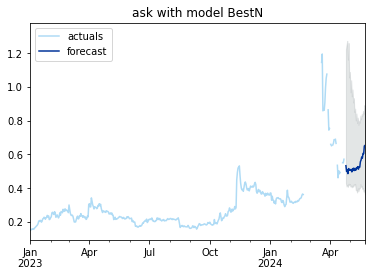

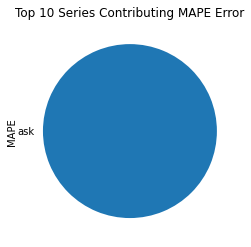

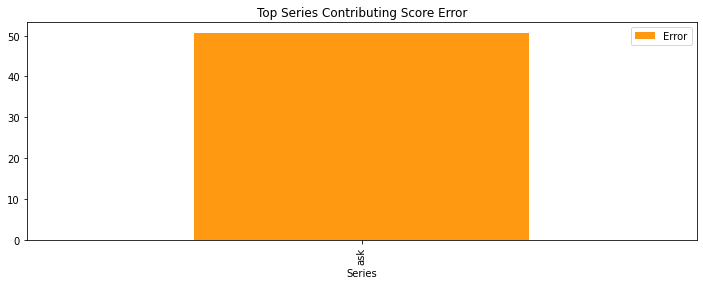

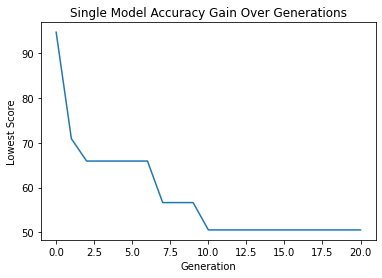

In [59]:
prediction.plot(
    model.df_wide_numeric,
    series=model.df_wide_numeric.columns[0],
    remove_zeroes=False,
    start_date="2023-01-01",
)
plt.show()



In [ ]:
# plot a sample
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2024-04-23")
# Print the details of the best model
print(model)

# point forecasts dataframe

# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

# accuracy of all tried model results
